# Explore train data

You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items in 10 different stores.

To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of the train data containing only a single month history.

Your initial goal is to read the input data and take the first look at it.
This course is taken from  Yauhen Babakhin

In [17]:
# Import pandas
import pandas  as pd

# Read train data
train = pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/CRIPSDM/demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


# Explore test data

Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, that the test dataset generally contains one column less than the train one.

This column, together with the output format, is presented in the sample submission file. Before making any progress in the competition, you should get familiar with the expected output.

That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's explore the format of the sample submission. The train DataFrame is available in your workspace.

In [18]:
import pandas as pd

# Read the test data
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [19]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


# Prepare your first submission

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor



# Create a Random Forest object
rf =    RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor()

# Prepare a submission

You've already built a model on the training data from the Kaggle Store Item Demand Forecasting Challenge. Now, it's time to make predictions on the test data and create a submission file in the specified format.

In [21]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

# Public vs Private leaderboard
## Overfitting 
###  Train XGBoost models

Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. Again, you are working with the Store Item Demand Forecasting Challenge. The train DataFrame is available in your workspace.

Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The single hyperparameter you will change is:

    max_depth - maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.


In [22]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=train[['store', 'item']],
                     label=train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [23]:
# Define xgboost parameters
params2 = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params2, dtrain=dtrain)

[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [24]:
# Define xgboost parameters
params3 = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15= xgb.train(params=params3, dtrain=dtrain)

[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:10:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




# Explore overfitting XGBoost

Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you will measure the quality of each model on both the train data and the test data. As you know by now, the train data is the data models have been trained on. The test data is the next month sales data that models have never seen before.

The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that takes two arguments: true values and predicted values.

train and test DataFrames together with 3 models trained (xg_depth_2, xg_depth_8, xg_depth_15) are available in your workspace.

In [25]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data=train[['store', 'item']])
dtest = xgb.DMatrix(data=test[['store', 'item']])
# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.691
MSE Train: 112.057. MSE Test: 30.699
MSE Train: 84.952. MSE Test: 3.568


So, you see that the third model with depth 15 is already overfitting. It has considerably lower train error compared to the second model, however test error is higher. Be aware of overfitting and move on to the next chapter to know how to beat it!
# Understand the problem
1. Understand the problem

In the previous chapter, we got acquainted with what Machine Learning competition actually looks like, and had an overview of the general competition process. Now it's time to start solving the problems!
2. Solution workflow

Before proceeding, let's take a look at the broad scheme that we'll be using throughout the subsequent chapters. Let's call it a 'solution workflow'. Typically it consists of four major stages. First, we start by understanding the problem and the competition metric.
3. Solution workflow

Then we need to make some EDA (exploratory data analysis) in order to see and understand the data we're working with.
4. Solution workflow

The next very important step is to establish the local validation strategy. We already know that its goal is to prevent overfitting.
5. Solution workflow

Finally, the longest part of the competition is Modeling, which includes continuous improvements of the solution. In this chapter, we will talk about the first three blocks. The third and fourth chapters are entirely devoted to Modeling.
6. Understand the problem

To understand the problem we need to perform the following steps. Determine the data type we will be dealing with. Is it the usual tabular data?
7. Understand the problem

Or maybe we're given time series data.
8. Understand the problem

Or it's unstructured data like images.
9. Understand the problem

Or text, and so on. It could be even a mix of multiple data types. In this course, we mostly concentrate on the tabular data and time series. No worries, the general solution workflow is the same for any data type. The next step is to determine the problem type. We've talked about it a little in the previous chapter. Here we should select between classification, regression, ranking and so on. Lastly, we should get familiar with the metric being optimized. As we already know, every competition has a single metric. It is used by Kaggle to evaluate the submissions and to determine the best performing solution.
10. Metric definition

Generally, the majority of the metrics can be found in the sklearn.metrics library. However, there are some special competition metrics that are not available in scikit-learn. In such cases, we have to create metrics manually. Suppose we're solving the competition problem with Root Mean Squared Logarithmic Error as an evaluation metric. This metric is not implemented in scikit-learn. Its formula is presented on the slide. N is the number of observations in the test set, y is the actual value, y hat is the predicted value. So, it is a usual Root Mean Squared Error in a logarithmic scale. In this situation, we have to define a custom function that takes as input the true and predicted values, and outputs the metric value. Firstly, we compute squares under the sum using numpy log and power methods. Finally, we get the square root of the mean over all the observations, and return the result. 
# Define a competition metric

Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.

For now, your goal is to manually develop a couple of competition metrics in case if they are not available in sklearn.metrics.

In particular, you will define:

    Mean Squared Error (MSE) for the regression problem:

Logarithmic Loss (LogLoss) for the binary classification problem:


In [27]:
import numpy as np

# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err
y_regression_pred=  model.predict(dtrain)
y_regression_true= train.sales
print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 84.95210. 
Your MSE: 84.95187. 


In [28]:
import numpy as np

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

NameError: name 'y_classification_true' is not defined

Great! You see that your functions work the same way that built-in sklearn metrics. Knowing the problem type and evaluation metric, it's time to start Data Analysis. Let's move on to the next lesson on EDA!
# EDA
1. Initial EDA

Now we know how to figure out what problem we're addressing, and how to use the appropriate metric. The next step is to look at the data and find interesting patterns in it using Exploratory Data Analysis (EDA for short).
2. Goals of EDA

EDA has multiple goals. To start with, we could get the size of the train and test data. It will give us an idea of how much resources we need for the competition and what models we could use. Then we could investigate the properties of the target variable. For example, there could be a high class imbalance in the classification problem, or a skewed distribution in the regression problem. Similarly, we could look at the properties of the features. Finding some peculiarities and dependencies between features and target variable is always useful. Also, EDA is a good place to start in order to generate some ideas and future hypotheses on feature engineering.
3. Two sigma connect: rental listing inquiries

In this video we'll work with another Kaggle competition. It's called "Two sigma connect: rental listing inquiries". In this Kaggle competition, we need to predict how popular an apartment rental listing is based on the listing content. The target variable, 'interest_level', is defined by the number of inquiries a listing obtains. Interest level is split into 3 groups: high, medium and low. So, we have a classification problem with 3 classes. And the metric is a multi-class logarithmic loss.
4. EDA. Part I

Generally, the first part of the EDA is to look at some basic statistics regarding our data. So, let's start with reading train and test data and finding their shape. We see that train dataset has about 50 thousand observations and 11 columns. The test has about 75 thousand observations and all the columns except for the target variable.
5. EDA. Part I

Then let's look at the columns. We have the id of the observation, the number of bathrooms and bedrooms in the apartments, the exact coordinates of the apartments, the manager responsible for this listing, the renting price. And finally the target variable: 'interest_level'. Then, for example, we could obtain the distribution of 'interest_level' using pandas' value_counts() method. The majority of the listings have low interest, while only about four thousand observations have high interest. It means that we have some class imbalance. However, it's not so crucial to apply any class balancing methods.
6. EDA. Part I

Another useful approach to take a first glimpse at the data is pandas' describe() method. It shows the basic statistics of all the numeric columns in the DataFrame. Let's apply it to our train data. We see the minimum and maximum values, together with quartiles and mean values, as well as the count and standard deviation.
7. EDA. Part II

The next part of the EDA is to actually draw some plots and find interesting dependencies. We will use the matplotlib library. Let's import pyplot from matplotlib as plt and use ggplot style. As an example, let's compare the median price of the apartments across different interest levels. For this purpose, we use pandas' group_by() method and get the median. Note that we specified 'as_index' parameter to False in order not to turn 'interest_level' into the index.
8. EDA. Part II

We then create a figure and use the bar() method to plot 'interest_level' versus median price. Also, set titles for the axis and the plot itself. Finally, calling the show() method to see a plot.
9. EDA. Part II

As we see, medium and high interest listings have lower prices. It means that people are searching for cheaper apartments. A potentially useful new feature would be the price per bedroom. If an apartment has a price per bedroom lower than market average, then the listing could obtain higher interest. 

# EDA statistics

As mentioned in the slides, you'll work with New York City taxi fare prediction data. You'll start with finding some basic statistics about the data. Then you'll move forward to plot some dependencies and generate hypotheses on them.

The train and test DataFrames are already available in your workspace.

In [29]:
# Read train data
train = pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/CRIPSDM/taxi_train_chapter_4.csv')
# Read train data
test = pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/CRIPSDM/taxi_test_chapter_4.csv')

#
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
print(train.head())

Train shape: (20000, 8)
Test shape: (9914, 7)
   id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1  


In [30]:
# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Train head()
print(train.head())

# Describe the target variable
print(train.fare_amount.describe())

# Train distribution of passengers within rides
print(train.passenger_count.value_counts())

Train shape: (20000, 8)
Test shape: (9914, 7)
   id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1  
count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%

All right! You just obtained a couple of descriptive statistics about the data. You can look at them to understand the data structure. However, they are not informative enough to get ideas for the future solution.

In [ ]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

Nice plot! It's obvious now that there is a clear dependency between ride distance and fare amount. So, ride distance is, probably, a good feature. Let's find some others!
# EDA plots II

Another idea that comes to mind is that the price of a ride could change during the day.

Your goal is to plot the median fare amount for each hour of the day as a simple line plot. The hour feature is calculated for you. Don't worry if you do not know how to work with the date features. We will explore them in the chapter on Feature Engineering.

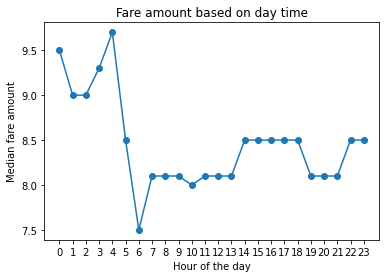

In [32]:
# Create hour feature
import matplotlib.pyplot as plt 
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

In [6]:
# Traget encoding :
https://maxhalford.github.io/blog/target-encoding/

In [94]:
check_string = "cccccaa bbbb f,fkfff "

count = {}
for s in check_string:
    if s in count:
        count[s] += 1
    else:
        count[s] = 1

for key in count:
    if count[key] > 1:
        print( key, count[key])

c 5
a 2
  3
b 4
f 5


In [25]:
from collections import Counter
arr = np.array([0, 5, 5, 0, 2, 4, 3, 0, 0, 5, 4, 1, 9, 9])
Counter(arr)

Counter({0: 4, 5: 3, 2: 1, 4: 2, 3: 1, 1: 1, 9: 2})

In [90]:
set(results.values())

{1, 2, 4}

In [124]:
# Use urllib.request to send network request if needed.

import fileinput

inputData = ''

for line in fileinput.input():
    inputData += line


def codeHere(inputData):
    # Use the function to return the solution.
    import re 
    import collections
    # get only alphanum value preprocess our string  : lower case + eliminate punctuation
    string_clean = re.sub(r"[^a-zA-Z0-9]+",'', inputData.lower().strip())
    results = collections.Counter(string_clean)
    finalresult = sorted(results.items())
    l1={1}
    dic = collections.OrderedDict()
    if set(results.values()) == l1:
        print('none')
    else:
        #print(finalresult)
        for key, value in finalresult:
            if value >= 2:
                dic[key]=value
    return ("\n".join(f'{k} {v}' for k, v in dic.items()))


print(codeHere(inputData))


a 2
b 4
c 5
f 5


In [113]:
dic = {'a':3, 'b':2, 'c':3}
print(dic)

dictkeys = dic.keys() # or values/items
print(dictkeys)

keylist = []
keylist.extend(iter(dictkeys)) # my big revelation
print('keylist', keylist)

{'a': 3, 'b': 2, 'c': 3}
dict_keys(['a', 'b', 'c'])
keylist ['a', 'b', 'c']


In [80]:
# Use urllib.request to send network request if needed.

import fileinput

inputData = ''

for line in fileinput.input():
    inputData += line


def codeHere(inputData):
    # Use the function to return the solution.
    import re 
    import collections
    # get only alphanum value preprocess our string  : lower case + eliminate punctuation
    string_clean = re.sub(r"[^a-zA-Z0-9]+",'', inputData.lower().strip())
    results = collections.Counter(string_clean)
    finalresult = sorted(results.items())
    for key, value in finalresult:
        if value >= 2:
            print(key, value)


print(codeHere(inputData))

FileNotFoundError: [Errno 2] No such file or directory: '-f'

In [49]:
>>> import pandas as pd
>>> import numpy as np
>>> np.random.RandomState(100)
>>> num_series = pd.Series(np.random.randint(1, 5, [15]))
num_series[~num_series.isin(num_series.value_counts().index[:1])] ='replaced'
>>> jupyter nbconvert --to script [YOUR_NOTEBOOK].ipynb

SyntaxError: invalid syntax (<ipython-input-49-070908258d88>, line 6)

In [51]:
! jupyter nbconvert --to script [YOUR_NOTEBOOK].ipynb

This application is used to convert notebook files (*.ipynb) to various other

[NbConvertApp] WARNING | pattern '[YOUR_NOTEBOOK].ipynb' matched no files



formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting 

In [52]:
>>> from IPython.core.display import display, HTML
>>> display(HTML("<style>.container { width:100% !important; }</style>"))



    (https://nbconvert.readthedocs.io/en/latest/usage.html#reveal-js-html-

    slideshow) for more details.

--nbformat=<Enum> (NotebookExporter.nbformat_version)

    Default: 4

    Choices: [1, 2, 3, 4]

    The nbformat version to write. Use this to downgrade notebooks.

To see all available configurables, use `--help-all`

Examples
--------

    The simplest way to use nbconvert is
    
    > jupyter nbconvert mynotebook.ipynb
    
    which will convert mynotebook.ipynb to the default format (probably HTML).
    
    You can specify the export format with `--to`.
    Options include ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides'].
    
    > jupyter nbconvert --to latex mynotebook.ipynb
    
    Both HTML and LaTeX support multiple output templates. LaTeX includes
    'base', 'article' and 'report'.  HTML includes 'basic' and 'full'. You
    can specify the flavor of the format used.
    
    > jupyter nbconvert --to 